# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Normalize-by-population" data-toc-modified-id="Normalize-by-population-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Normalize by population</a></div>

A little notebook to help visualise the official numbers for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

The data is dynamically loaded from: https://github.com/CSSEGISandData/COVID-19

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from jhu_helpers import *

In [3]:
jhu = aggregte_jhu_by_state(*get_jhu_data())

In [4]:
#jhu.confirmed.columns.tolist() # print a list of all countries in the data set

In [5]:
# look at recent numbers from highly affected countries
get_aggregate_top_n(jhu.confirmed)

Country/Region,China,Italy,Spain,Germany,Iran,US,France,"Korea, South",Switzerland,United Kingdom,Netherlands,Austria,Belgium,Norway,Sweden,Denmark,Malaysia,Portugal,Japan
Date,,,,,,,,,,,,,,,,,,,
2020-03-16,81033,27980,9942,7272,14991,4632,6668,8236,2200,1551,1416,1018,1058,1333,1103,933,566,331,825
2020-03-17,81058,31506,11748,9257,16169,6421,7699,8320,2700,1960,1711,1332,1243,1463,1190,1025,673,448,878
2020-03-18,81102,35713,13910,12327,17361,7783,9105,8413,3028,2642,2058,1646,1486,1550,1279,1116,790,448,889
2020-03-19,81156,41035,17963,15320,18407,13677,10947,8565,4075,2716,2467,2013,1795,1746,1439,1225,900,785,924
2020-03-20,81250,47021,20410,19848,19644,19100,12726,8652,5294,4014,3003,2388,2257,1914,1639,1337,1030,1020,963


In [6]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    'Singapore', 
    'US',
    'France',
    'Germany',
    'Spain',
]

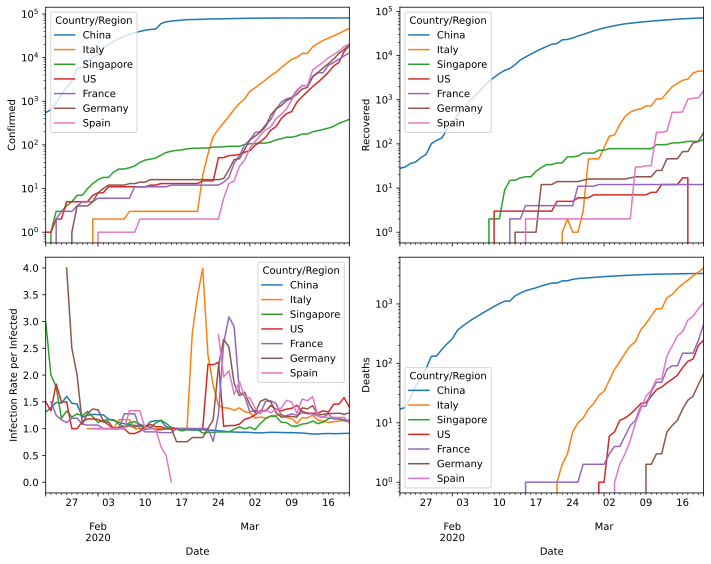

In [7]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, num=1)

jhu.confirmed[plot_countries].plot(ax=ax1[0,0], logy=True)
ax1[0,0].set_ylabel('Confirmed')

smooth_rate_d = 3
jhu.infection_rate[plot_countries].rolling(smooth_rate_d, center=True, min_periods=1).mean().plot(ax=ax1[1,0], logy=False)
ax1[1,0].set_ylabel('Infection Rate per Infected')

jhu.recovered[plot_countries].plot(ax=ax1[0,1], logy=True)
ax1[0,1].set_ylabel('Recovered')

jhu.deaths[plot_countries].plot(ax=ax1[1,1], logy=True)
ax1[1,1].set_ylabel('Deaths')

fig1.tight_layout()

In [8]:
# save the above figure
#fig1.savefig('sars-covid-19_timeseries.png')

In [9]:
## Scratch

In [10]:
set(jhu.columns.get_level_values(0))

{'confirmed', 'deaths', 'infected', 'infection_rate', 'recovered'}

In [11]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    #'Singapore', 
    'US',
    'Korea, South',
    'France',
    'Germany',
    'Spain',
]

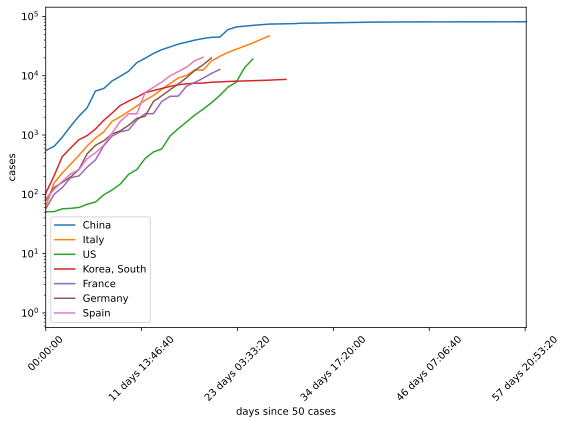

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
confirmed_thres = 50

for country in plot_countries:
    confirmed = jhu.confirmed[country]
    index_after_thres_cross = confirmed[confirmed>confirmed_thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

xmin, xmax = ax.get_xlim()
ax.set_xlim(0, xmax)

ax.set_xlabel('days since 50 cases')
ax.set_ylabel('cases')


fig.tight_layout()

fig.savefig('cases.pdf')

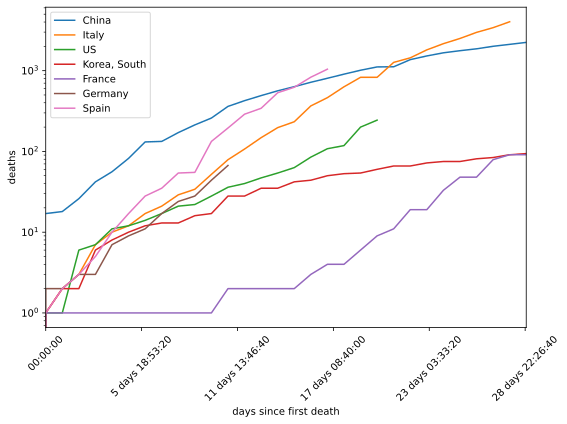

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
thres = 0

for country in plot_countries:
    confirmed = jhu.deaths[country]
    if len(confirmed[confirmed>thres]) == 0:
        continue
    index_after_thres_cross = confirmed[confirmed>thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

ax.set_xlabel('days since first death')
ax.set_ylabel('deaths')

ax.set_xlim(0, ax.get_xlim()[1]/2)
fig.tight_layout()

## Normalize by population

In [21]:
wikipedia_populations = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')[0]

populations_dict = {row['Country (or dependent territory)']:row['Population'] for idx,row in wikipedia_populations.iterrows()}

In [29]:
populations_dict['US'] =  populations_dict['United States[c]']

In [34]:
populations_dict['China']=populations_dict['China[b]']
populations_dict['Korea, South']=populations_dict['South Korea']
populations_dict['France'] = populations_dict['France[e]']

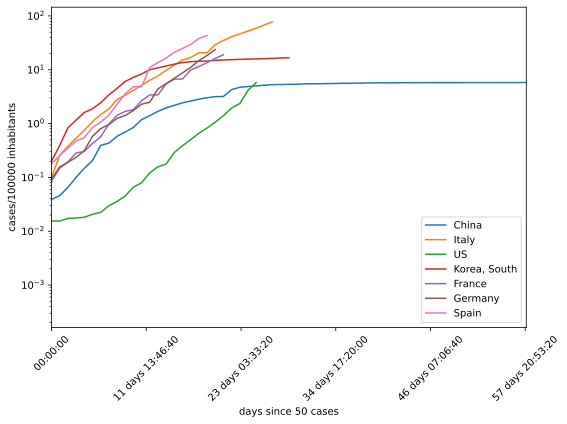

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
confirmed_thres = 50

for country in plot_countries:
    population = populations_dict[country]
    confirmed = jhu.confirmed[country]
    index_after_thres_cross = confirmed[confirmed>confirmed_thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed*=(100000/population)
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

xmin, xmax = ax.get_xlim()
ax.set_xlim(0, xmax)

ax.set_xlabel('days since 50 cases')
ax.set_ylabel('cases/100000 inhabitants')


fig.tight_layout()

fig.savefig('cases_normalized.pdf')

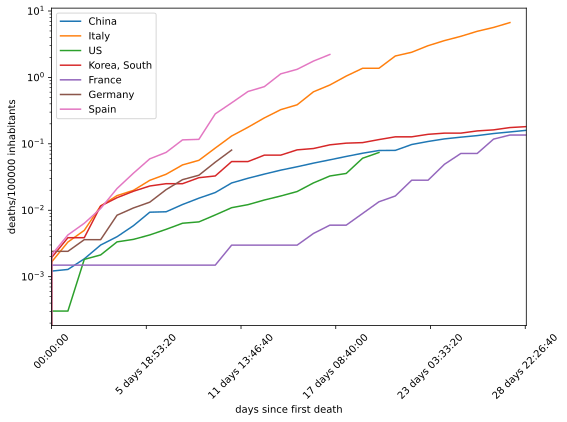

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
thres = 0

for country in plot_countries:
    population = populations_dict[country]

    confirmed = jhu.deaths[country]
    if len(confirmed[confirmed>thres]) == 0:
        continue
    index_after_thres_cross = confirmed[confirmed>thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed*=(100000/population)
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

ax.set_xlabel('days since first death')
ax.set_ylabel('deaths/100000 inhabitants')

ax.set_xlim(0, ax.get_xlim()[1]/2)
fig.tight_layout()